# Simulation of 1D Shallow Water Equations

## Numerical Solution using Finite Element Method

### Input Parameters

Input parameters are crucial in programming and data analysis for several reasons:

1. **Flexibility**: They allow functions and programs to be more flexible and reusable. By passing different input parameters, the same function can perform a variety of tasks without modification.

2. **Modularity**: Input parameters help in breaking down complex problems into smaller, manageable pieces. Each function can focus on a specific task, making the code easier to understand and maintain.

3. **Scalability**: They enable the handling of different data sets or conditions without changing the core logic of the program. This is particularly important in data analysis, where the same analysis might need to be applied to different data sets.

4. **Testing and Debugging**: With input parameters, it is easier to test and debug functions. You can pass different values to the function to see how it behaves, which helps in identifying and fixing issues.

5. **Interoperability**: In collaborative environments, input parameters allow different parts of a system to interact seamlessly. Different modules or components can call functions with the required parameters, ensuring smooth integration.

Overall, input parameters are a fundamental concept that enhances the functionality, efficiency, and maintainability of code.

In [50]:
# input parameters

# Physical domain 
x_initial = 0 # (m) initial domain coordinate
x_final = 10 # (m) final domain coordinate

# DG method
N_elements= 25 # number of elements
p_basis_order = 4 # lagrange basis order

# simulation time
n_steps = 200 # number of time steps
t_limit = 1 # (s) simulation time limit

# Gauss cuadrature
n_gauss_poins = 20 

# plotting setting
plot_every_steps = 200

# PDE evolution method # 0: euler, 1: rk4
evolution_method = 1

## Generacion de cuadricula de elementos

La generación de una malla y una cuadrícula es fundamental en el método de elementos finitos, especialmente en el método de Galerkin discontinuo (DG), por varias razones:

1. **Discretización del dominio**: La malla divide el dominio continuo en elementos finitos más pequeños, lo que permite aproximar la solución de la ecuación diferencial en cada uno de estos elementos. En el método DG, cada elemento puede tener su propia solución polinómica, lo que permite capturar discontinuidades y variaciones abruptas en la solución.

2. **Flexibilidad en la representación**: La cuadrícula permite representar geometrías complejas y adaptarse a diferentes escalas de variación en la solución. Esto es especialmente útil en problemas donde la solución tiene características locales que requieren una mayor resolución.

3. **Precisión y convergencia**: Una malla bien diseñada puede mejorar la precisión de la solución y la tasa de convergencia del método numérico. En el método DG, la elección de la malla y el orden de los polinomios en cada elemento son cruciales para obtener resultados precisos.

4. **Implementación de condiciones de contorno**: La malla facilita la implementación de condiciones de contorno, ya que permite definir claramente los límites del dominio y aplicar las condiciones adecuadas en los nodos correspondientes.

5. **Paralelización y eficiencia computacional**: La estructura de la malla permite dividir el problema en subproblemas más pequeños que pueden ser resueltos en paralelo, mejorando la eficiencia computacional. En el método DG, cada elemento puede ser tratado de manera independiente, lo que facilita la paralelización.

En resumen, la generación de una malla y una cuadrícula es un paso esencial en el método de elementos finitos, ya que permite discretizar el dominio, representar la solución con flexibilidad, mejorar la precisión y eficiencia computacional, y aplicar condiciones de contorno de manera efectiva.

In [51]:
def generate_1d_mesh(initial_coord, final_coord, num_elements, basis_order):
    """
    Genera una malla unidimensional (1D) en el dominio físico especificado.

    @param initial_coord: Coordenada inicial del dominio físico.
    @param final_coord: Coordenada final del dominio físico.
    @param num_elements: Número de elementos en la malla.
    @param basis_order: Orden de la base de Lagrange.

    @return: Coordenadas de los nodos en el espacio físico.
    """
    
    print(f'Generando malla \nDominio físico: [{initial_coord},{final_coord}] metros\nNúmero de elementos: {num_elements}\nNodos por elemento: {basis_order+1}\nOrden de la base de Lagrange: {basis_order}')

    # Generar coordenadas de los elementos
    elements_division = np.linspace(initial_coord, final_coord, num_elements + 1)

    # Calcular las coordenadas de los nodos en el espacio físico dentro de cada elemento
    if basis_order != 0:
        nodes_coord_phys_space = np.array([np.linspace(elements_division[i], elements_division[i + 1], basis_order + 1) for i in np.arange(num_elements)])
    else:
        nodes_coord_phys_space = np.array([[elements_division[i] + 0.5 * (elements_division[i+1] - elements_division[i])] for i in np.arange(num_elements)])

    return nodes_coord_phys_space

nodes_coordinates_phys_space = generate_1d_mesh(x_initial, x_final, N_elements, p_basis_order)


Generando malla 
Dominio físico: [0,10] metros
Número de elementos: 25
Nodos por elemento: 5
Orden de la base de Lagrange: 4


In [52]:
import numpy as np

# import inputs
import basis
import initial_conditions
import evolve 
import integrator
import test

# running some test
test.test_lagrange_basis()
test.test_lagrange_basis_derivative()
test.test_integration()
# test.test_mass_matrix()

element_number = np.arange(N_elements)
element_lengths = nodes_coordinates_phys_space[:,-1] - nodes_coordinates_phys_space[:,0]

# generating reference space information
gauss_weights, basis_values_at_gauss_quad, basis_values_x_derivative_at_gauss_quad, basis_values_at_nodes = basis.generate_reference_space(nodes_coordinates_phys_space, n_gauss_poins)

# generating initial conditions
h, u = initial_conditions.generate_initial_conditions(nodes_coordinates_phys_space)

# compute entropy : integral 0.5 * ( g * h**2 + h * u ) dx
entropy = evolve.compute_entropy(element_lengths, gauss_weights, basis_values_at_gauss_quad, h, u)

# compute mass matrix M_ij = integral phi_i(x) phi_j(x) dx and return the inverse matrix of M_ij
mass_matrix_inverse = evolve.compute_mass_matrix_inverse(element_lengths, gauss_weights, basis_values_at_gauss_quad)

# time step
time_step = np.array(t_limit/n_steps) 

Saving initial conditions


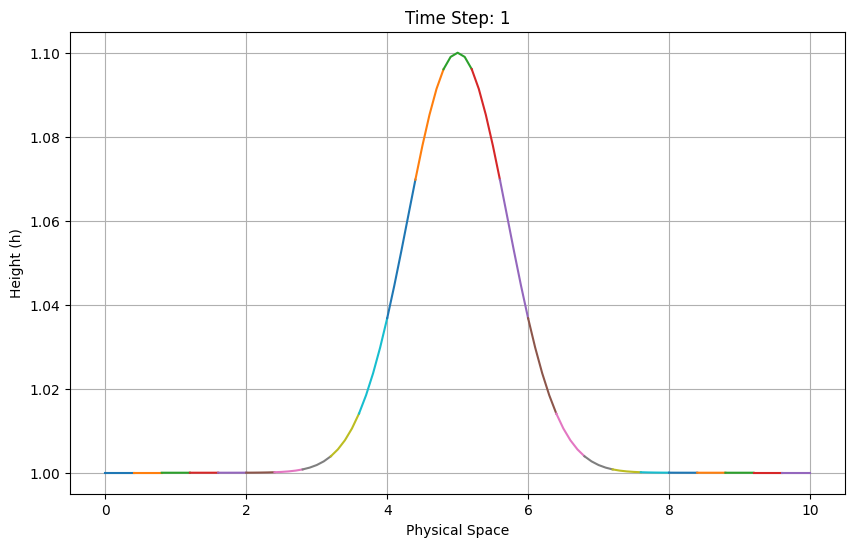

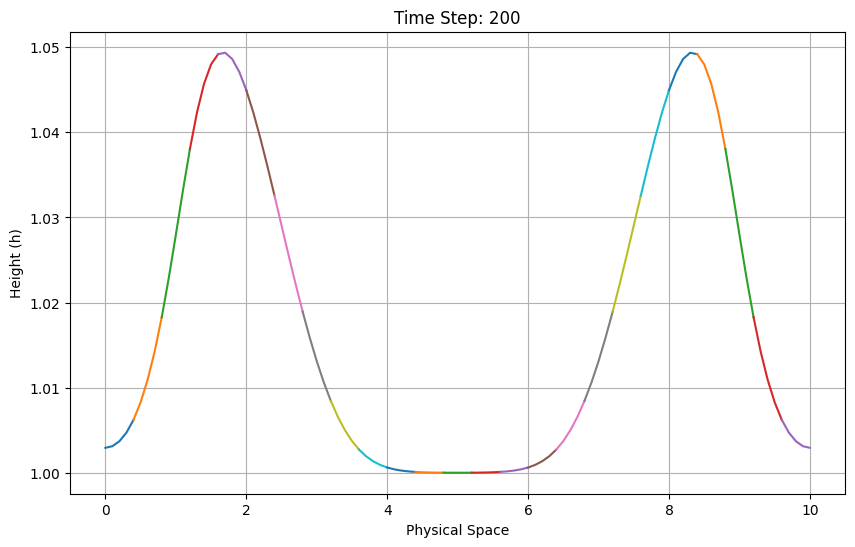

Done


In [ ]:

# evolving in time the PDE
for number_of_t_step in np.arange(n_steps):


    # saving the data
    if (number_of_t_step+1) % plot_every_steps == 0 or number_of_t_step == 0:

        # print(f'Number of time step : {number_of_t_step+1} / {n_steps}')

        # plotting
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        plt.clf()  # Clear the current figure
        for i in range(N_elements):
            plt.plot(nodes_coordinates_phys_space[i], h[i], label=f'Element {i}')
        plt.xlabel('Physical Space')
        plt.ylabel('Height (h)')
        plt.title(f'Time Step: {number_of_t_step}')
        # plt.legend()
        plt.grid(True)
        plt.show()
        
    # If true using euler method
    if evolution_method==0:
        h, u = integrator.euler_method( h, u, time_step, element_number, basis_values_at_gauss_quad, basis_values_x_derivative_at_gauss_quad, gauss_weights, element_lengths, basis_values_at_nodes, mass_matrix_inverse)

    # If true using RK4 method
    if evolution_method==1:
        h, u = integrator.rk4_method( h, u, time_step, element_number, basis_values_at_gauss_quad, basis_values_x_derivative_at_gauss_quad, gauss_weights, element_lengths, basis_values_at_nodes, mass_matrix_inverse)

    # compute entropy : integral 0.5 * ( g * h**2 + h * u ) dx
    # entropy = evolve.compute_entropy(element_lengths, gauss_weights, basis_values_at_gauss_quad, h, u)

    # writing data
    # integrator.write_data_file(nodes_coordinates_phys_space,entropy,h,u,False,number_of_t_step+1, t_limit, n_steps)

print(f'Done')